## Introduction

Exponential-family random graph models (ERGMs) represent a general class of models based in exponential-family theory for specifying the probability distribution for a set of random graphs or networks. Within this framework, one can—among other tasks—obtain maximum-likehood estimates for the parameters of a specified model for a given data set; test individual models for goodness-of-fit, perform various types of model comparison; and simulate additional networks with the underlying probability distribution implied by that model.

The purpose of representing the graphs or networks in this exponential shape is to allow them take a positive value and also measure the probability associated with the given adjacency matrix for the graph at hand which is the most intuitive way of making the $g$ statistics as a probability measure.

The basic equation of ergm models are presented below.

$P(Y = y) = \frac{e^{\theta^Tg(y)}}{\kappa(\theta)}$

$\kappa(\theta) = \sum_{x \in Y}{e^{\theta^Tg(x)}}$

$Y$ represents the Random Variable for all the graphs, and $y$ represents the graph at hand.

$g$ stands for the statistics we want to include in our model.

$\kappa(\theta)$ is a normalizing term to make the whole equation as a probability measure.

### Logodds, Logit and Interpreting the Results

We are used to thinking about probability as a number between 0 and 1 (or equivalently, 0 to 100%). But this is just a particular mathematical representation of the “degree of plausibility.”

There is a second representation of “degree of plausibility” with which you are familiar: odds ratios. For example, if I tell you that “the odds that an observation is correctly classified is 2:1”, you can check that the probability of correct classification is two thirds. Similarly, “even odds” means 50%. In a similar fashion, the log-odds being the logarithm of odds is capturing a sense of probability of an event happening. There is acutally a term for this kind of capturing the probability called Evidence. The basic formula for evidence is the following: 

$Evidence = log_{10}(odds) = log_{10}(\frac{p}{1 - p})$

There is indeed, a relation between Evidence and how we try to explain the coefficients we get in our ERGM model.
Assume two graphs having the same edges. We denote the graph having the edge $ij$ and all the other edges the same as $y^+_{ij}$. Also, we denote the graph lacking edge $ij$ and al the other edges alluded at first as $y^-_{ij}$.

take the log of the division of the probability resulted by ERGM as follows: 

$log(\frac{p(y^+_{ij})}{p(y^-_{ij})}) = \theta^T[g(y^+_{ij}) - g(y^-_{ij})]$

As you can see the left part of the equation results in a log odds format. So, we can state that with edge $ij$ being added to the network the evidence of the network would increase with the magnitude of $\theta$.

To link the basic understanding we develop here, you can think of the results with respect to their probability in the followin way: 

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;odds = e^s$

$P(True) = \frac{e^s}{1 + e^s}\;\;\;\;\;\;\;\;\;\;P(False) = \frac{1}{1 + e^s}$


### Erdos-Renyi

An easy Example of this probabily model would be the Erdos-Renyi random model which accounts for the number of links in the model and density of the netowrk. 

Having the probability model of erdos-renyi graph, we can rewrite the equation and reach the final equation in the form of an ERGM. 

$l(g) = number\;of\;links$

$P(x) = p^{l(g)}(1 - p)^{n(n-1)/2 - l(g)}$

$P(x) = (\frac{p}{1 - p})^{l(g)}(1-p)^{n(n-1)/2 - l(g)}$

$P(x) = exp(logit(p)l(g) - c)$

### Importing the library statnet including all the required libraries for our work 
ergm, sna, and network packages are included (no need to be imported directly)

In [1]:
library('statnet')

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
network        "1.16.1"  "1.17.0" "4.1.0"
statnet.common "4.4.1"   "4.5.0"  "4.1.0"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
set.seed(0)
# for the purpose of repeatability of the results

In [6]:
# Loading the dataset
# This dataset contains two networks, namely, the flomarriage and flobusiness 
data(florentine)

In [7]:
flomarriage

 Network attributes:
  vertices = 16 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 20 
    missing edges= 0 
    non-missing edges= 20 

 Vertex attribute names: 
    priorates totalties vertex.names wealth 

No edge attributes

To get the attributes related to the edges or vertices present in the graph we can use the command, get.[vertex, edges].attributes(network, "name of the attribute")

In [16]:
family_names = get.vertex.attribute(flomarriage, 'vertex.names')

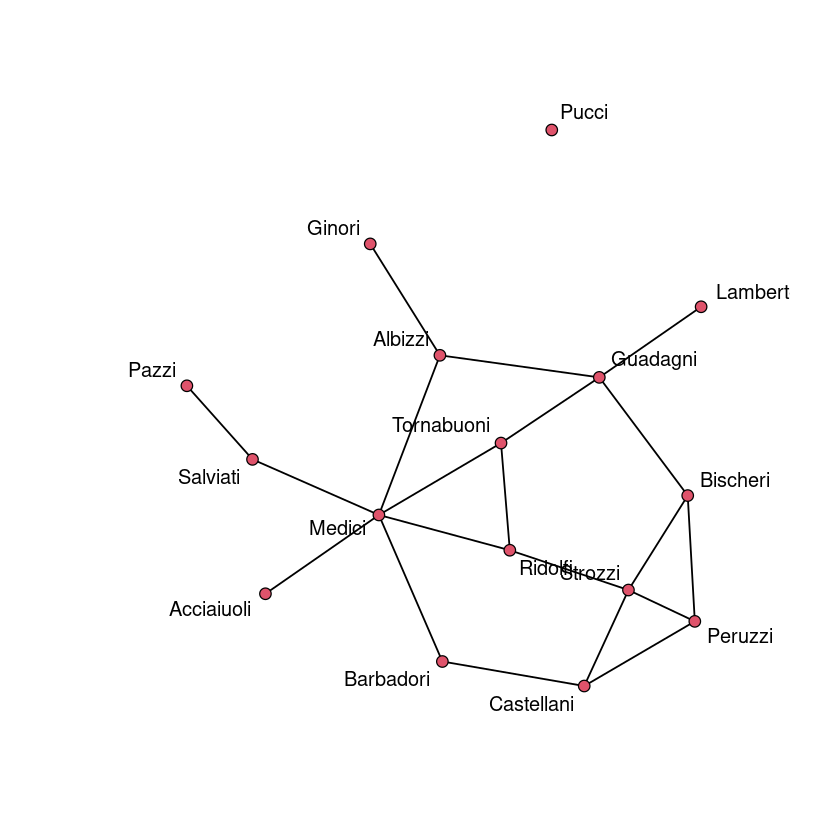

In [17]:
par(bg = 'white')
plot(flomarriage, label = family_names)

### Bernouli Model (Erdos-Renyi)

In [21]:
flomodel.01 <- ergm(flomarriage ~ edges) 

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




In [22]:
summary(flomodel.01) 

Call:
ergm(formula = flomarriage ~ edges)

Iterations:  5 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges  -1.6094     0.2449      0  -6.571   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 119  degrees of freedom
 
AIC: 110.1    BIC: 112.9    (Smaller is better.) 

To interpret the results we can write the following equation stating the with each unit increase in the number of links, the logodds of having a tie would change to which degree.

$logodds = -1.6094 \times 1$

With respect to the equation we got for evidence and probability, we can state that the probability of observing the network having the edge $ij$ is: 

$\frac{e^{-1.6094}}{1 + e^{-1.6094}} = 0.200007583$

This value is completely inline with the density of the graph which in the Bernouli Model is the probability of having a tie.